In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/ArabicAutomobileDataset.csv')  # Replace with your actual file path

# Map sentiment labels to integers
label_map = {'Neg': 0, 'Pos': 1, 'Mix': 2}
data['Polarity'] = data['Polarity'].map(label_map)

data.head()


,Polarity,Text
0,0,اللي سمعته وقريته انه يشرب بنزين وعزمه ميت.
1,2,مازدا 6 مكينة سكاي اكتف اقتصادية بالبنزين لكن ...
2,0,الكوري سوناتا وابتما صرفيتهم بالنسبه للبقيه مر...
3,1,مازدا 6 افضل ياباني واقتصادية وشوف انتشارها مم...
4,1,التشارجر ملفتة للنظر، شبابية وجميلة، بالإضافة ...


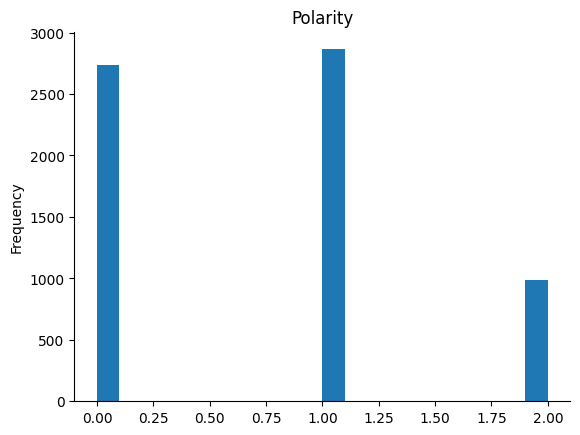

In [ ]:
from matplotlib import pyplot as plt
data['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from transformers import AutoTokenizer

# Load AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')

def tokenize_data(data):
    return data['Text'].apply(lambda x: tokenizer(x, padding='max_length', truncation=True, max_length=128))

data_tokenized = pd.DataFrame(tokenize_data(data).tolist())
data_tokenized['label'] = data['Polarity']

print(data_tokenized.head())
data_tokenized.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                      attention_mask  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                           input_ids  \
0  [2, 1729, 30162, 5108, 2437, 889, 40191, 26266...   
1  [2, 25991, 465, 27, 22050, 466, 27941, 2326, 1...   
2  [2, 9597, 24438, 13099, 13536, 321, 4580, 6637...   
3  [2, 25991, 465, 27, 5118, 35743, 17501, 40368,...   
4  [2, 22828, 964, 183, 44559, 197, 12252, 103, 2...   

                                      token_type_ids  label  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      2  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1  
4  [0, 0, 0, 0, 

,attention_mask,input_ids,token_type_ids,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[2, 1729, 30162, 5108, 2437, 889, 40191, 26266...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 25991, 465, 27, 22050, 466, 27941, 2326, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 9597, 24438, 13099, 13536, 321, 4580, 6637...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 25991, 465, 27, 5118, 35743, 17501, 40368,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 22828, 964, 183, 44559, 197, 12252, 103, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [ ]:
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = self.df.iloc[idx]
        input_ids = torch.tensor(item['input_ids'], dtype=torch.long)
        attention_mask = torch.tensor(item['attention_mask'], dtype=torch.long)
        label = torch.tensor(item['label'], dtype=torch.long)
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}

dataset = SentimentDataset(data_tokenized)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to compute metrics
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_df, val_df = train_test_split(data_tokenized, test_size=0.2, random_state=42)

# Create dataset objects
train_dataset = SentimentDataset(train_df)
val_dataset = SentimentDataset(val_df)

# Check the sizes of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


Training dataset size: 5268
Validation dataset size: 1317


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
model = AutoModelForSequenceClassification.from_pretrained('aubmindlab/bert-base-arabertv02', num_labels=3)
# Train the model with early stopping
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    report_to='none',  # Disable WandB logging properly
    fp16=True,  # Mixed precision training
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Ensure strategies match
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Function to compute metrics like accuracy
)

trainer.train()


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.234958,0.935459,0.934721,0.935459,0.933968
2,0.473800,0.247996,0.935459,0.938775,0.935459,0.936442
3,0.473800,0.223943,0.949886,0.949585,0.949886,0.949524
4,0.208200,0.204318,0.958998,0.959007,0.958998,0.958996
5,0.077200,0.206555,0.958998,0.959241,0.958998,0.959092


TrainOutput(global_step=1650, training_loss=0.23393459695758242, metrics={'train_runtime': 325.0945, 'train_samples_per_second': 81.023, 'train_steps_per_second': 5.075, 'total_flos': 1732601855738880.0, 'train_loss': 0.23393459695758242, 'epoch': 5.0})

In [ ]:
# Save the model and tokenizer
model.save_pretrained('./arabert_sentiment_model')
tokenizer.save_pretrained('./arabert_sentiment_model')


('./arabert_sentiment_model/tokenizer_config.json',
 './arabert_sentiment_model/special_tokens_map.json',
 './arabert_sentiment_model/vocab.txt',
 './arabert_sentiment_model/added_tokens.json',
 './arabert_sentiment_model/tokenizer.json')

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict sentiment
def on_button_click(b):
    new_text = text_input.value
    new_text_tokenized = tokenizer(new_text, padding='max_length', truncation=True,
                                   max_length=128, return_tensors='pt')
    new_text_tokenized = {key: val.to(device) for key, val in new_text_tokenized.items()}

    model.eval()
    with torch.no_grad():
        output = model(**new_text_tokenized)
        prediction = torch.argmax(output.logits, dim=1).item()

    inv_label_map = {0: 'neg', 1: 'pos', 2: 'mix'}
    predicted_sentiment = inv_label_map[prediction]
    print(f"Sentiment: {predicted_sentiment}")

# Create widgets for text input and button
text_input = widgets.Text(description='Enter text:')
button = widgets.Button(description="Predict Sentiment")
button.on_click(on_button_click)

display(text_input, button)


Text(value='', description='Enter text:')

Button(description='Predict Sentiment', style=ButtonStyle())

Sentiment: mix
